<a href="https://colab.research.google.com/github/sujitojha1/EVA4/blob/rev5/S12/EVA4_S12_Solution_assignment_B_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement EVA 4, Session12 : TinyImagenet

**Target**: 


* Assignment B:
  1. Download 50 images of dogs. 
Use this (Links to an external site.) to annotate bounding boxes around the dogs.
  2. Download JSON file. 
  3. Describe the contents of this JSON file in FULL details (you don't need to describe all 10 instances, anyone would work). 
  4. Refer to this tutorial (Links to an external site.). Find out the best total numbers of clusters. Upload link to your Colab File uploaded to GitHub. 

**Results**

*  Total number of clusters (no transformation) = 5
*  Total number of clusters with log transformation = 5

**Analysis**

*  Total number of cluster of bounding boxes are 5

## 1. Loading Module and data

In [1]:
# Load modules/models from EVA course
!rm -rf EVA4
!git clone -b rev5 https://github.com/sujitojha1/EVA4 -q --quiet
print("Loaded EVA4 Modules")

# Loading required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

# For inline matplotlib plotting
%matplotlib inline

Loaded EVA4 Modules


In [0]:
# Loading annotation data frame
df_annot = pd.read_csv("EVA4/S12/images/annotation_csv_manually_cleaned.csv")


## 2. Data Explorations & transformations

In [3]:
# Visualinzing the sample table
df_annot.head(4)

,filename,img_id,img_width,img_height,region_count,bbox_x,bbox_y,bbox_width,bbox_height
0,00100trPORTRAIT_00100_BURST20191126134713895_C...,0,1008,756,1,102,131,874,519
1,20190208_063211.jpg,1,1008,490,1,49,95,646,247
2,bubbles1.jpg,2,805,806,1,427,233,336,485
3,Cali.jpg,3,2341,2604,1,439,543,1386,1883


In [6]:
# Normalizing the bbox width & height with img width and height
df_annot['bbox_width_norm'] = df_annot['bbox_width']/df_annot['img_width']
df_annot['bbox_height_norm'] = df_annot['bbox_height']/df_annot['img_height']
df_annot[['filename','img_width','img_height','bbox_width','bbox_height','bbox_width_norm','bbox_height_norm']].head(4)

,filename,img_width,img_height,bbox_width,bbox_height,bbox_width_norm,bbox_height_norm
0,00100trPORTRAIT_00100_BURST20191126134713895_C...,1008,756,874,519,0.867063,0.686508
1,20190208_063211.jpg,1008,490,646,247,0.640873,0.504082
2,bubbles1.jpg,805,806,336,485,0.417391,0.601737
3,Cali.jpg,2341,2604,1386,1883,0.592055,0.723118


In [7]:
# Log transfomration of BBox normalized width and height
df_annot['bbox_width_norm_log'] = np.log(df_annot['bbox_width_norm'])
df_annot['bbox_height_norm_log'] = np.log(df_annot['bbox_height_norm'])
df_annot[['filename','img_width','img_height','bbox_width_norm','bbox_height_norm','bbox_width_norm_log','bbox_height_norm_log']].head(4)

,filename,img_width,img_height,bbox_width_norm,bbox_height_norm,bbox_width_norm_log,bbox_height_norm_log
0,00100trPORTRAIT_00100_BURST20191126134713895_C...,1008,756,0.867063,0.686508,-0.142643,-0.376137
1,20190208_063211.jpg,1008,490,0.640873,0.504082,-0.444924,-0.685017
2,bubbles1.jpg,805,806,0.417391,0.601737,-0.873731,-0.507935
3,Cali.jpg,2341,2604,0.592055,0.723118,-0.524156,-0.324182


# Plotting Bounding Box width and height

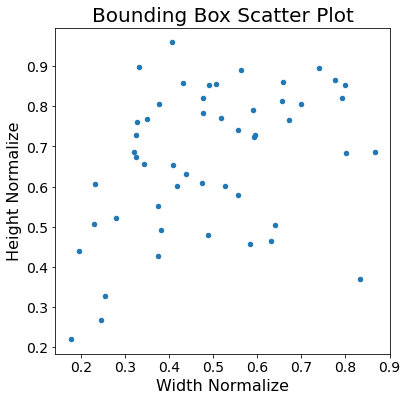

In [20]:
# Plotting normalized Box width and heigth
df_annot.plot(x='bbox_width_norm',y='bbox_height_norm',kind='scatter',figsize=(6,6),fontsize=14)
plt.xlabel('Width Normalize',fontsize=16)
plt.ylabel('Height Normalize',fontsize=16)
plt.title('Bounding Box Scatter Plot',fontsize=20)
plt.show()

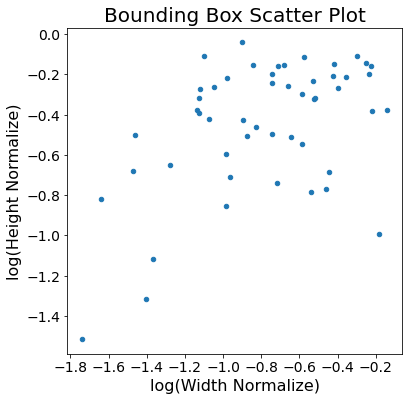

In [22]:
# Plotting log transformed normalized Box width and heigth
df_annot.plot(x='bbox_width_norm_log',y='bbox_height_norm_log',kind='scatter',figsize=(6,6),fontsize=14)
plt.xlabel('log(Width Normalize)',fontsize=16)
plt.ylabel('log(Height Normalize)',fontsize=16)
plt.title('Bounding Box Scatter Plot',fontsize=20)
plt.show()

# K Means Clustering (Bounding Box without log transformation)

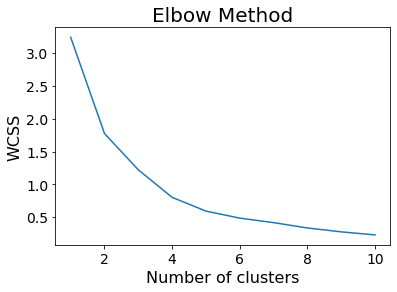

In [38]:
#X = df_annot[['bbox_width_norm','bbox_height_norm']].values
#y = df_annot['bbox_height_norm'].values.reshape(-1, 1)
X = df_annot[['bbox_width_norm','bbox_height_norm']].values

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method',fontsize=20)
plt.xlabel('Number of clusters',fontsize=16)
plt.ylabel('WCSS',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

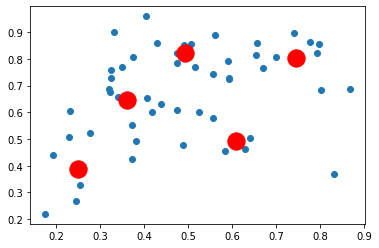

In [40]:
# Optimum number of cluster based on above graph is 5

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

# K Means Clustering (Bounding Box with log transformation)

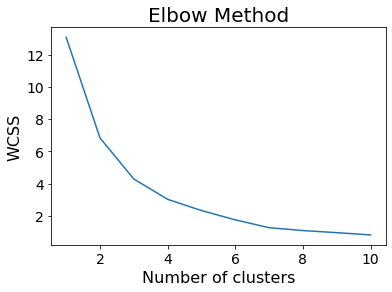

In [41]:
#X = df_annot[['bbox_width_norm','bbox_height_norm']].values
#y = df_annot['bbox_height_norm'].values.reshape(-1, 1)
X = df_annot[['bbox_width_norm_log','bbox_height_norm_log']].values

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method',fontsize=20)
plt.xlabel('Number of clusters',fontsize=16)
plt.ylabel('WCSS',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

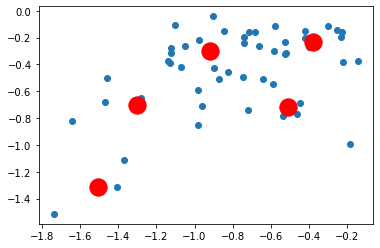

In [42]:
# Optimum number of cluster based on above graph is 5

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()